<center><h1>Fundamentos Data Science parte 1</h1><center>
    Autor: Walther Becks

<h2>Desafío 1: Determinantes del ingreso</h2>

Usted trabaja para un organismo no gubernamental que está interesado en las dinámicas
socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza
extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa
de las Naciones Unidas para el Desarrollo.
Le encomiendan el desarrollo de un **modelo predictivo** sobre la **probabilidad que un
individuo presente salarios por sobre o bajo los 50.000 dólares anuales**, en base a una serie
de atributos sociodemográficos.

**Datos Asociados: income-db.csv**

## Hito 1: Análisis Preliminar del problema

* Se pide desarrollar un modelo predictivo para determinar la probabilidad de ocurrencia de mi Variable Dependiente, que los individuos entren en cierto criterio de rango salarial.
* La variable del vector objetivo es categórica binarizada.
* Nos solicitan la ocurrencia de esta, esto hace que el problema sea de **regresión logística**.
* Prepocesamiento y limpieza de datos:
    * Para ello se procederá a reemplazar los perdidos como '?' y transformarlos a nulos
    * Revisar la estructura de datos, con enfásis en que las variables númericas no sean de tipo texto.
    * Análisis exploratorio de datos perdidos para evaluar el uso de variables y columnas
    * Las métricas de desempeño son:
        * Modelo Machine Learning:
            * F1:
            * Precission:
            * Recall:
            * Accuracy:
            * AUC:
        * Para el modelo Econometrico:
            * Log Verosimilitud:
* Una vez lista la base se procederá al análisis exploratorio de variable
* Una vez listo el análisis exploratorio de variables se procederá con la **Modelación descriptiva** para definir los principales determinantes de la variable dependiente.
* Una vez lista la modelación descriptiva, se procederá con la **Modelación predictiva**, donde se buscará una solución analítica que aumente las metricas de desempeño

**Librerías a utilizar:** 

1. pandas == 1.2.0
2. numpy == 1.20.3
3. scipy == 1.7.3  
4. matplotlib == 3.0.3
5. seaborn == 0.11.2 
6. statsmodels == 0.13.2
7. conda == 4.8.3
8. python == 3.7.3
9. missingno == 0.5.1

-----------

## Hito 2

## Aspectos computacionales:
### Importe de librerías

In [78]:
import pandas as pd # Librería de manipulación de datos
import numpy as np # Librería de manipulación de datos
import matplotlib.pyplot as plt # Librería de visualización de datos y gráficos
import seaborn as sns # Librería de visualización de datos y gráficos
sns.set_style('darkgrid') # Parte de la librería de seaborn, que permite un estilo distinto al default en visualización
import missingno # Librería de visualización de falta de datos para análisis exploratorio
import warnings # Librería para ignorar las advertencias que arroja Python por cambio de versiones y ver un código más claro
warnings.filterwarnings('ignore') # Importe de la opción de ignorar las advertencias.

# Clasificación desde la Econometría
import statsmodels.api as sm # Librería que permite funciones y clases para la estimación de múltiples modelos estadísticos, como también pruebas estadisticas y exploración estadística.
import statsmodels.formula.api as smf # Librería que permite la creación del modelo en base a una formula y Data Frame.
# Clasificación desde el Machine Learning
from sklearn import linear_model # Importe de librería de herramientas de predicción de análisis de datos para modelos lineales y regresión logística
from sklearn.model_selection import train_test_split # Librería para dividir la muestra entre entrenamiento y prueba
from sklearn.metrics import mean_squared_error, r2_score # Librería que importa herramientas de análisis de error cuadratico y error cuadratico medio
from sklearn.preprocessing import StandardScaler # Librería de estandarización de variables de muestras de prueba y entrenamiento usado para Machine Learning
from sklearn.metrics import classification_report, roc_curve, confusion_matrix,accuracy_score,recall_score,precision_score,roc_auc_score # Librerías de Machine Learning utilizadas para medir la efectividad de los modelos.

import functions # Funciones creadas ad-hoc para la realización de este examen. 
plt.style.use('seaborn') # Gráficos estilo seaborn
plt.rcParams['figure.figsize'] = (10,6) # Ampliar las figuras gráficas
plt.rcParams["figure.dpi"] = 200 # Mejora de calidad de los gráficos
pd.set_option('display.max_rows', None) # Opción que permite ver todas las filas al cargar un Data Frame
pd.set_option('display.max_columns', None) # Opción que permite ver todas las columnas de un Data Frame

<hr>

## Descripción: 
### Importe de datos

In [2]:
df = pd.read_csv('income-db.csv')
print(f"Tenemos {df.shape[0]} filas y {df.shape[1]} columnas")
df.head()

Tenemos 48842 filas y 15 columnas


age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

<hr>

### Limpieza de base de datos

#### Valores nulos

In [3]:
df = df.replace(to_replace='?',value= np.nan)
df.apply(lambda x: f"{round((x[x.isna()].shape[0]/x.shape[0])*100, 2)}%").sort_values(ascending = False).to_frame().rename(columns = {0:'% nulos'})

% nulos
occupation        5.75%
workclass         5.73%
native-country    1.75%
age                0.0%
fnlwgt             0.0%
education          0.0%
educational-num    0.0%
marital-status     0.0%
relationship       0.0%
race               0.0%
gender             0.0%
capital-gain       0.0%
capital-loss       0.0%
hours-per-week     0.0%
income             0.0%

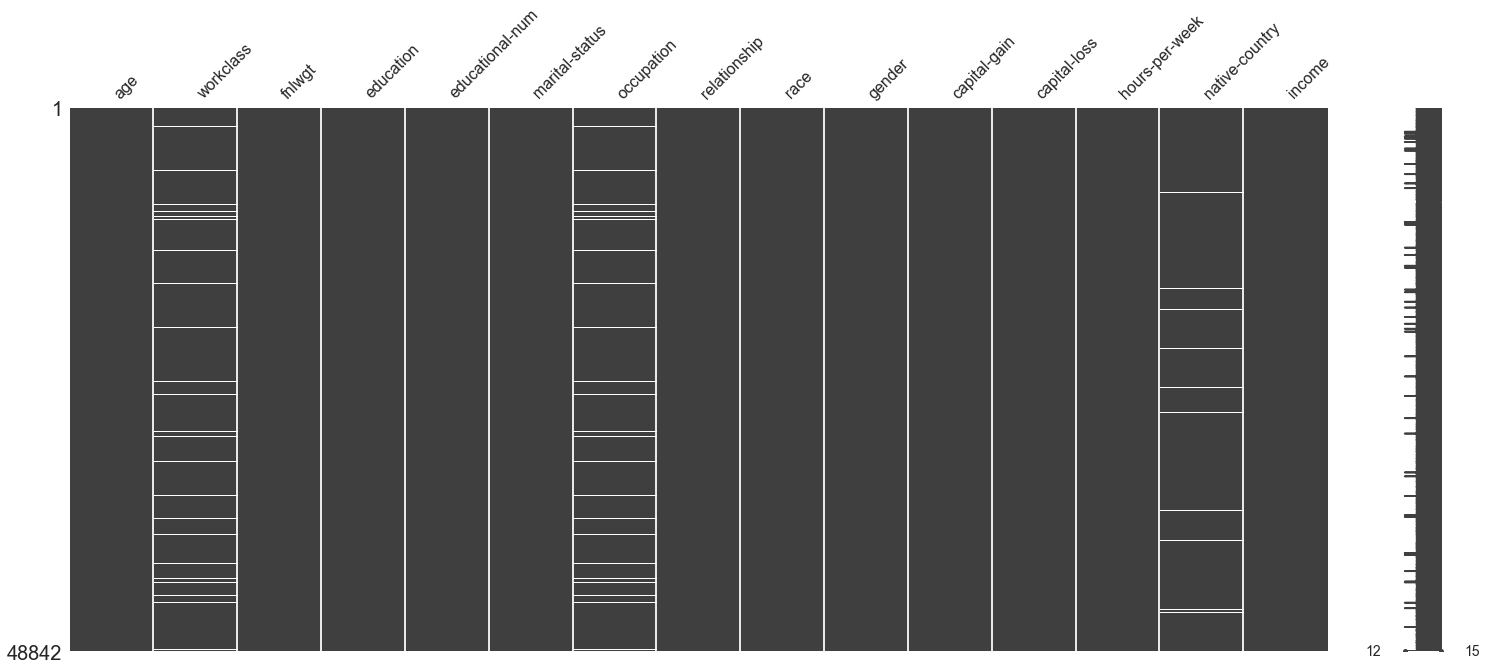

In [4]:
missingno.matrix(df)

<hr>

In [5]:
df_droped_na = df.dropna()
print(f"Se procedió a limpiar la base de valores nulos eliminandolos, debido a que el porcentaje de datos nulos no es significativa, con lo que se consiguió conservar un {round(df_droped_na.shape[0]/df.shape[0]*100)}% de los datos, se perdieron {df.shape[0]-df_droped_na.shape[0]} filas y se mantuvieron {df_droped_na.shape[0]}\nPodemos observar que las columnas occupation, workclass y native-country son las únicas columnas con datos faltantes con un 5.75%, 5.73% y 1.75% respectivamente.")

Se procedió a limpiar la base de valores nulos eliminandolos, debido a que el porcentaje de datos nulos no es significativa, con lo que se consiguió conservar un 93% de los datos, se perdieron 3620 filas y se mantuvieron 45222
Podemos observar que las columnas occupation, workclass y native-country son las únicas columnas con datos faltantes con un 5.75%, 5.73% y 1.75% respectivamente.


### Tipo de datos

In [6]:
df_droped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


* Podemos observar que tenemos 2 grupos de tipos de datos:
    * Continuo int64:
        * Age
        * Fnlwgt
        * Educational-num
        * Capital-gain
        * Capital-loss
        * Hours-per-week
    * Categórico del tipo object:
        * Workclass
        * Education
        * Marital-status
        * Occupation
        * Relationship
        * Race
        * Gender
        * Native-country
        * Income

In [7]:
df_droped_na.sample(5)

age workclass  fnlwgt  education  educational-num marital-status  \
42352   39   Private  200153  Bachelors               13       Divorced   
13478   28   Private  119545  Bachelors               13      Separated   
30226   47   Private  155124  Assoc-voc               11       Divorced   
20372   33   Private  288825    HS-grad                9       Divorced   
42069   18   Private  170627       11th                7  Never-married   

           occupation   relationship   race  gender  capital-gain  \
42352    Adm-clerical  Not-in-family  White    Male             0   
13478           Sales  Not-in-family  White    Male             0   
30226  Prof-specialty  Not-in-family  White  Female             0   
20372    Craft-repair  Not-in-family  White    Male             0   
42069   Other-service      Own-child  White  Female             0   

       capital-loss  hours-per-week native-country income  
42352             0              40  United-States  <=50K  
13478             0              42  United-States  <=50K  
30226          1669              40  United-States  <=50K  
20372          2258              84  United-States  <=50K  
42069             0              15  United-States  <=50K

* **Podemos observar que luego de la limpieza de valores faltantes, al analizar el tipo de datos tenemos solo int64 para los valores numéricos continuos, y object para tipo string, de cualquier forma procederemos a analizar los valores únicos de las variables por la búsqueda de algún valor fuera de lugar o mal escrito o duplicadamente mal escrito**

In [8]:
grid = sns.PairGrid(df_bin.loc[:,['age','capital_gain','capital_loss','hours_per_week','educational_num','income_more_than_50K']],hue='income_more_than_50K')
grid = grid.map_diag(sns.histplot)
grid = grid.map_upper(sns.regplot, lowess=True,scatter_kws={'alpha':.5},line_kws={'color':'tomato'})
grid = grid.map_lower(sns.kdeplot, cmap='Blues_d')

workclass
['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']


education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']


marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']


occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']


relationship
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']


race
['Black' 'White' 'Other' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander']


gender
['Male' 'Female']


native-country
['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'H

### Análisis exploratorio inicial de variables numéricas continuas

In [9]:
df_droped_na.describe()

age        fnlwgt  educational-num  capital-gain  \
count  45222.000000  4.522200e+04     45222.000000  45222.000000   
mean      38.547941  1.897347e+05        10.118460   1101.430344   
std       13.217870  1.056392e+05         2.552881   7506.430084   
min       17.000000  1.349200e+04         1.000000      0.000000   
25%       28.000000  1.173882e+05         9.000000      0.000000   
50%       37.000000  1.783160e+05        10.000000      0.000000   
75%       47.000000  2.379260e+05        13.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  45222.000000    45222.000000  
mean      88.595418       40.938017  
std      404.956092       12.007508  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

### Análisis exploratorio inicial de variables no numéricas

In [10]:
df_droped_na.describe(include=object)

workclass education      marital-status    occupation relationship  \
count      45222     45222               45222         45222        45222   
unique         7        16                   7            14            6   
top      Private   HS-grad  Married-civ-spouse  Craft-repair      Husband   
freq       33307     14783               21055          6020        18666   

         race gender native-country income  
count   45222  45222          45222  45222  
unique      5      2             41      2  
top     White   Male  United-States  <=50K  
freq    38903  30527          41292  34014

#### Recodificación de las variables

1. Utilizando el importe de functions, recodificaremos y binarizaremos las variables
2. Normalizaremos las varibles numéricas (excepto las binarias).

In [98]:
df_recodificacion = functions.recodificaciones(df_droped_na)
df_recodificacion['income_bin'] = np.where(df_recodificacion['income']=='>50K',1,0)
df_bin = pd.get_dummies(df_recodificacion, drop_first = True)
df_norm = df_bin.select_dtypes('int64').apply(lambda x: (x - x.mean())/x.std()).join(df_bin.select_dtypes('uint8'))
print(f"**De las {df_recodificacion.shape[1]} columnas originales, se procedió a agregar {df_bin.shape[1]-df_recodificacion.shape[1]} columnas binarias, dejando un total {df_bin.shape[1]} columnas**")

df_norm.head()

**De las 16 columnas originales, se procedió a agregar 18 columnas binarias, dejando un total 34 columnas**


age    fnlwgt  educational-num  capital-gain  capital-loss  \
0 -1.024972  0.350886        -1.221545     -0.146732     -0.218778   
1 -0.041455 -0.945868        -0.438117     -0.146732     -0.218778   
2 -0.798006  1.393576         0.737026     -0.146732     -0.218778   
3  0.412476 -0.278417        -0.046402      0.877457     -0.218778   
5 -0.344075  0.084801        -1.613260     -0.146732     -0.218778   

   hours-per-week  relationship_Not-in-family  relationship_Other-relative  \
0       -0.078119                           0                            0   
1        0.754693                           0                            0   
2       -0.078119                           0                            0   
3       -0.078119                           0                            0   
5       -0.910931                           1                            0   

   relationship_Own-child  relationship_Unmarried  relationship_Wife  \
0                       1                       0                  0   
1                       0                       0                  0   
2                       0                       0                  0   
3                       0                       0                  0   
5                       0                       0                  0   

   race_Asian-Pac-Islander  race_Black  race_Other  race_White  gender_Male  \
0                        0           1           0           0            1   
1                        0           0           0           1            1   
2                        0           0           0           1            1   
3                        0           1           0           0            1   
5                        0           0           0           1            1   

   income_>50K  collars_others  collars_white-collar  workclass_recod_private  \
0            0               0                     0                        1   
1            0               0                     0                        1   
2            1               0                     0                        0   
3            1               0                     0                        1   
5            0               1                     0                        1   

   workclass_recod_self-employed  workclass_recod_state-level-gov  \
0                              0                                0   
1                              0                                0   
2                              0                                1   
3                              0                                0   
5                              0                                0   

   workclass_recod_unemployed  educ_recod_elementary-school  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
5                           0                             0   

   educ_recod_high-school  educ_recod_preschool  educ_recod_university  \
0                       1                     0                      0   
1                       1                     0                      0   
2                       0                     0                      0   
3                       0                     0                      0   
5                       1                     0                      0   

   civstatus_married  civstatus_never-married  civstatus_separated  \
0                  0                        1                    0   
1                  1                        0                    0   
2                  1                        0                    0   
3                  1                        0                    0   
5                  0                        1                    0   

   civstatus_widowed  region_asia  region_europa  
0           

In [99]:
df_recodificacion.head()

age  fnlwgt  educational-num   relationship   race gender  capital-gain  \
0   25  226802                7      Own-child  Black   Male             0   
1   38   89814                9        Husband  White   Male             0   
2   28  336951               12        Husband  White   Male             0   
3   44  160323               10        Husband  Black   Male          7688   
5   34  198693                6  Not-in-family  White   Male             0   

   capital-loss  hours-per-week income      collars  workclass_recod  \
0             0              40  <=50K  blue-collar          private   
1             0              50  <=50K  blue-collar          private   
2             0              40   >50K  blue-collar  state-level-gov   
3             0              40   >50K  blue-collar          private   
5             0              30  <=50K       others          private   

    educ_recod      civstatus   region  income_bin  
0  high-school  never-married  america           0  
1  high-school        married  america           0  
2      college        married  america           1  
3      college        married  america           1  
5  high-school  never-married  america           0

In [7]:
df_norm.columns = [i.replace('-','_').replace('>', 'more_than_') for i in df_norm.columns]
df_bin.columns = [i.replace('-','_').replace('>', 'more_than_') for i in df_norm.columns]
print("Finalmente se procedió a reemplazar los guiones y signos no compatibles con las librerías de machine learning para el set de datos binarizado(df_bin) y el estandarizado (df_norm)")
df_norm.columns.to_list()

Finalmente se procedió a reemplazar los guiones y signos no compatibles con las librerías de machine learning para el set de datos binarizado(df_bin) y el estandarizado (df_norm)


['age',
 'fnlwgt',
 'educational_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'relationship_Not_in_family',
 'relationship_Other_relative',
 'relationship_Own_child',
 'relationship_Unmarried',
 'relationship_Wife',
 'race_Asian_Pac_Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'gender_Male',
 'income_more_than_50K',
 'collars_others',
 'collars_white_collar',
 'workclass_recod_private',
 'workclass_recod_self_employed',
 'workclass_recod_state_level_gov',
 'workclass_recod_unemployed',
 'educ_recod_elementary_school',
 'educ_recod_high_school',
 'educ_recod_preschool',
 'educ_recod_university',
 'civstatus_married',
 'civstatus_never_married',
 'civstatus_separated',
 'civstatus_widowed',
 'region_asia',
 'region_europa']

## Inspección de variables

#### Variables categóricas

In [74]:
results_O = {'column':[], 'value':[]}
df_relationship = pd.DataFrame()
for i in (df_recodificacion.select_dtypes('O').columns):
    col = df_recodificacion[i].unique()
    
    if i == 'relationship':
        val = round(df_recodificacion[i].value_counts('%')*100,2).rename_axis('column').reset_index(name='percent')
        df_relationship = pd.DataFrame(val)
    #elif i = 
df_test

percent
relationship           
Husband           41.28
Not-in-family     25.88
Own-child         14.65
Unmarried         10.59
Wife               4.62
Other-relative     2.98

In [70]:
df_relationship

percent
relationship           
Husband           41.28
Not-in-family     25.88
Own-child         14.65
Unmarried         10.59
Wife               4.62
Other-relative     2.98

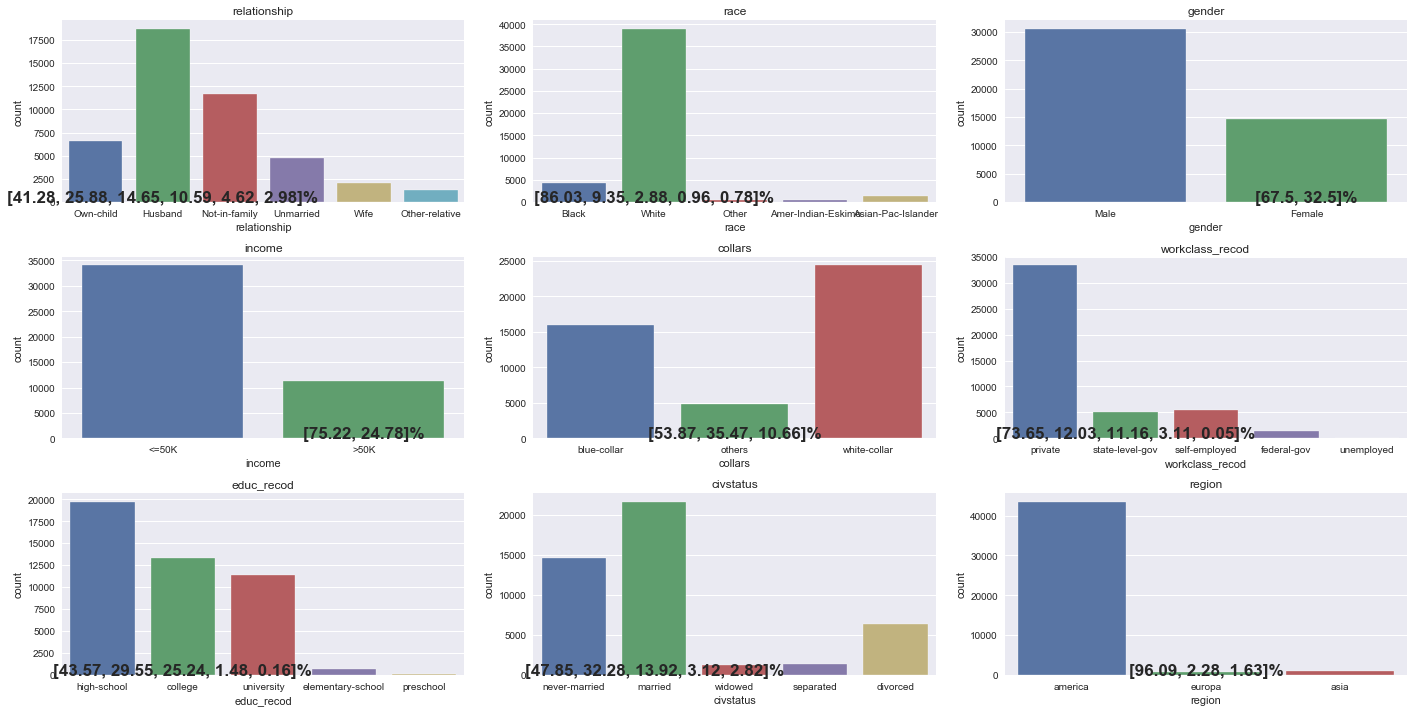

In [76]:
# Porcentajes
columns_O = []
values_O = []
for i in (df_recodificacion.select_dtypes('O').columns):
    col = df_recodificacion[i].unique().tolist()
    val = round(df_recodificacion[i].value_counts('%')*100,2).to_list()
    columns_O.append(col)
    values_O.append(val)
# Figura
plt.figure(figsize = (20,10))
for i, column in enumerate(df_recodificacion.select_dtypes('O').columns):
    plt.subplot(3,3,i+1)
    plt.title(column)
    
    plt.text(1,1,str(values_O[i])+'%',ha='center',weight='bold',fontsize=17)
    
    sns.countplot(df_recodificacion[column])
    
plt.tight_layout()

- Importante que los valores de porcentajes no están ordenados pero si ayuda a entender y especificar la proporcion
- Podemos observar que la muestra está sesgada por una predominancia de observaciones de:
    * Continente Americano 96%
    * Sector privado 54%
    * Raza blanca 86%
- Finalmente, el vector objetivo muestra una pre ponderancia inclinandose por personas que ganan menos de 50 mil USD (75%)

----------------

**Se procederá a calcular un histograma en base a la variable objetivo, siendo 1 = >50 K USD**

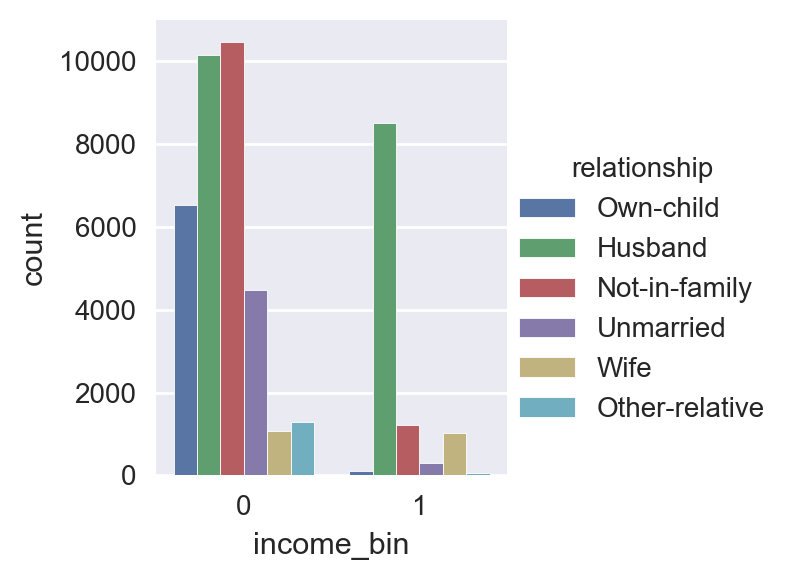

In [220]:
sns.catplot(data=df_recodificacion,kind='count', x="income_bin", hue="relationship",height=3)

**Podemos observar que para la variable objetivo = 1, hay una desproporción substancial en comparación a hombres y casados. Esto lo veremos junto a otros 2 graficos complementarios**

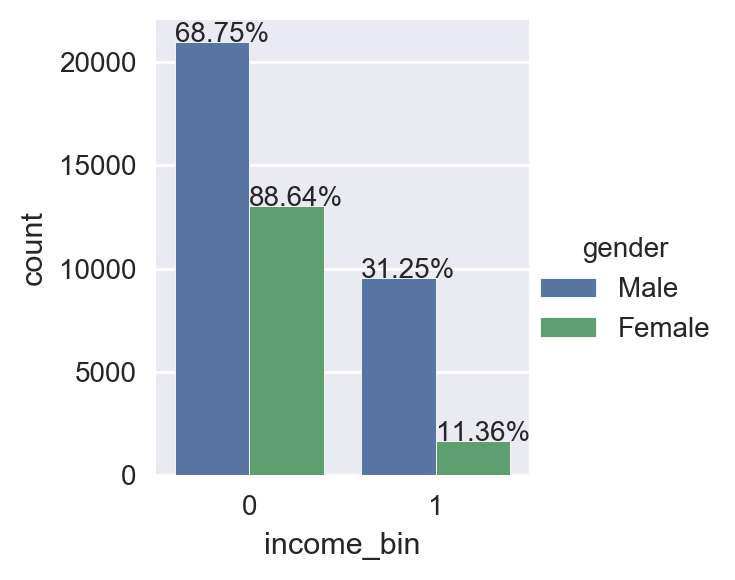

In [237]:
class_order = ['Male','Female'] 
hue_order = [0,1]
bar_order = product(class_order, hue_order)
catp = sns.catplot(data=df_recodificacion,kind='count', x="income_bin",hue='gender',height=3)


spots = zip(catp.ax.patches, bar_order)
for spot in spots:
    class_total = len(df_recodificacion[df_recodificacion['gender']==spot[1][0]])
    class_who_total = len(df_recodificacion[(df_recodificacion['gender']==spot[1][0]) & 
        (df_recodificacion['income_bin']==spot[1][1])])
    height = spot[0].get_height() 
    catp.ax.text(spot[0].get_x(), height+3, '{:1.2f}%'.format(100*class_who_total/class_total))

**En este grafico, se puede apreciar la diferencia substancial de casos de diferencia de genero. Mostrando que el 31.25% de los hombres en la muestra ganan sobre 50k USD, en cambio tan solo un 11.36% de las mujeres logran esto.**

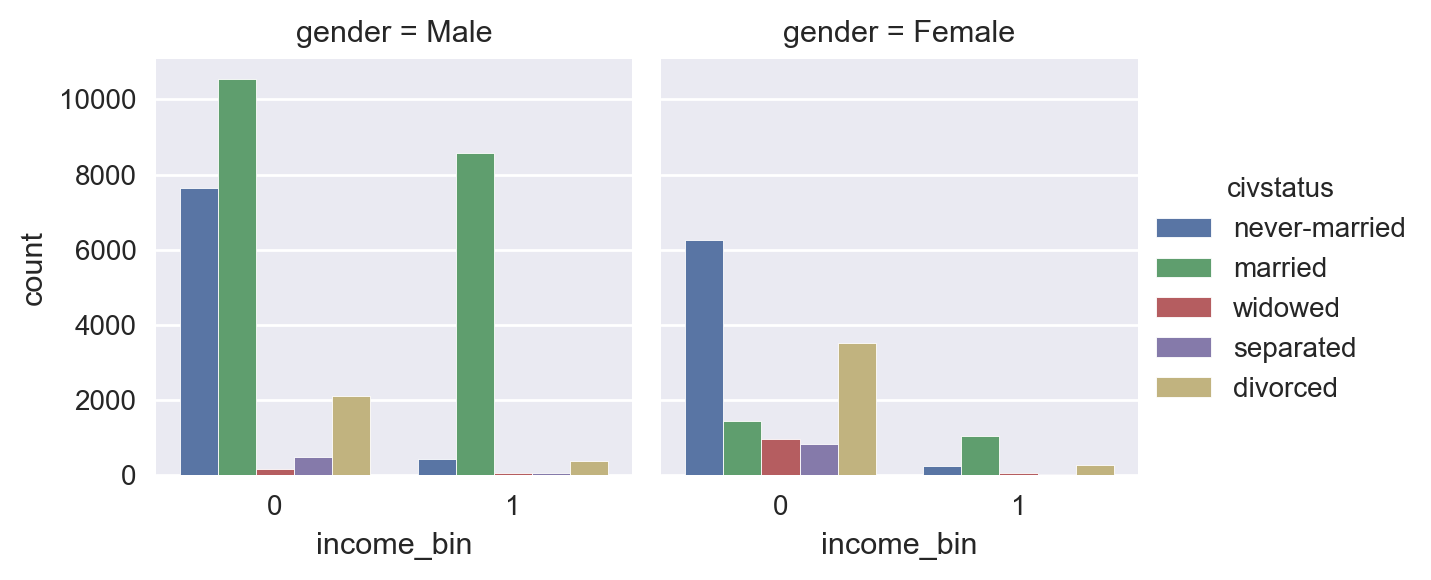

In [219]:
sns.catplot(data=df_recodificacion,kind='count', x="income_bin", hue="civstatus",col='gender',height=3)

**Podemos apreciar en este gráfico la afirmación de que sólo las personas casadas, para ambos generos son las que logran ingresos sobre 50k USD**

------------

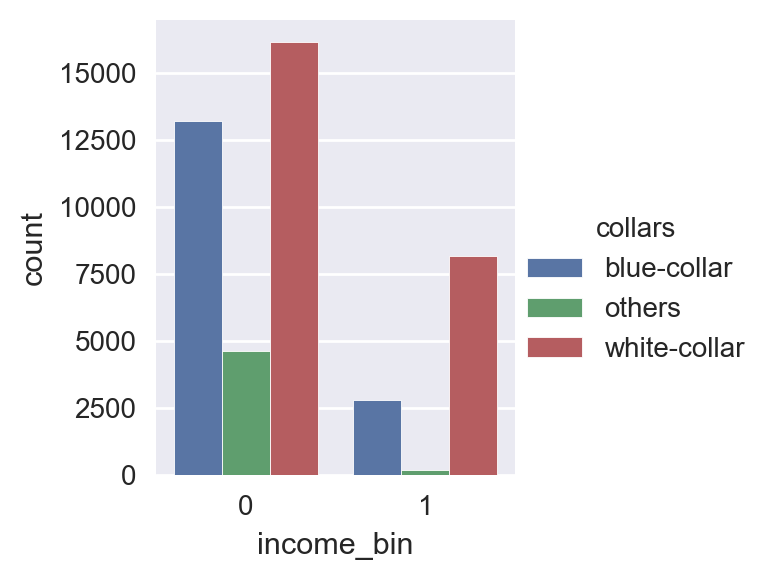

In [238]:
sns.catplot(data=df_recodificacion,kind='count', x="income_bin", hue="collars",height=3)

**Podemos apreciar en el grafico que la mayor proporción del vector objetivo es de white-collar, lo que alza preguntas de su relación con el nivel educacional y el sector en el cual se desempeña**

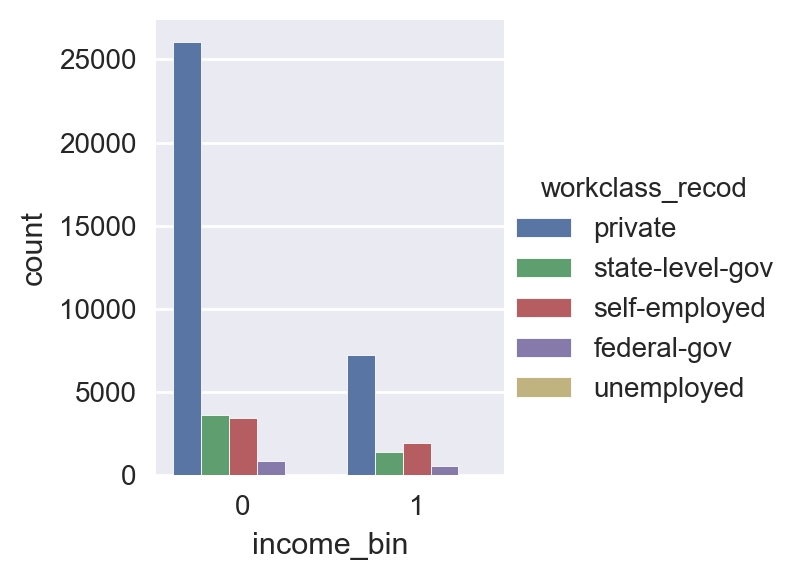

In [223]:
sns.catplot(data=df_recodificacion,kind='count', x="income_bin", hue="workclass_recod",height=3)

**Podemos apreciar que la mayor cantidad de casos de la muestra es en el sector privado (73,65%) y también el volúmen de casos:**

1. Private = 73%
2. Self-Employed = 12%
3. State-level-gov = 11%
4. Federal-gov = 3%

**Interesante caso a tener en consideración, que la proporción de casos del vector objetivo distribuye diferente, en donde apreciamos que la mayor proporción es en:** 
1. Federal-gov (39%)
2. Self-employed(36.2%)
3. State-level-gov (28.4%)
4. Sector privado (21.77%)

**Por lo que se puede inferir que si el Data Set fuera el universo muestral real, podríamos decir que el mejor sector para trabajar es en Federal-gov en donde el 40% de sus empleados ganan sobre 50K USD**

In [261]:
df1 = df_recodificacion['workclass_recod'].value_counts().rename_axis('unique_values').to_frame('count1')
df2_bin = df_recodificacion['workclass_recod'][df_recodificacion['income_bin']==1].value_counts().rename_axis('unique_values').to_frame('count2')
df3 = pd.DataFrame.merge(df1,df2_bin,how='inner',on='unique_values')
df3['percent'] = df3.apply(lambda x: round(100*x['count2']/x['count1'],2),1)
df3

count1  count2  percent
unique_values                           
private           33307    7251    21.77
self-employed      5442    1971    36.22
state-level-gov    5046    1435    28.44
federal-gov        1406     549    39.05
unemployed           21       2     9.52

In [262]:
df1_percent = df_recodificacion['workclass_recod'].value_counts('%').rename_axis('unique_values').to_frame('percent1')
df1_percent

percent1
unique_values            
private          0.736522
self-employed    0.120340
state-level-gov  0.111583
federal-gov      0.031091
unemployed       0.000464

In [263]:
df1_percent = df_recodificacion['workclass_recod'][df_recodificacion['income_bin']==1].value_counts('%').rename_axis('unique_values').to_frame('percent1')
df1_percent

percent1
unique_values            
private          0.646949
self-employed    0.175857
state-level-gov  0.128034
federal-gov      0.048983
unemployed       0.000178

-------

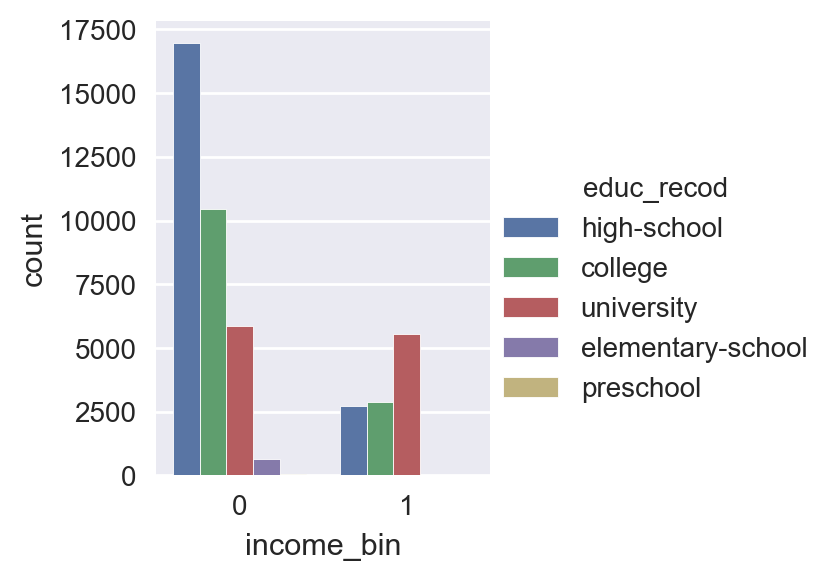

In [265]:
sns.catplot(data=df_recodificacion,kind='count', x="income_bin", hue="educ_recod",height=3)

**Podemos observar que en su gran mayoría el vector objetivo valora el nivel educacional universitario y también su proporción**

--------------

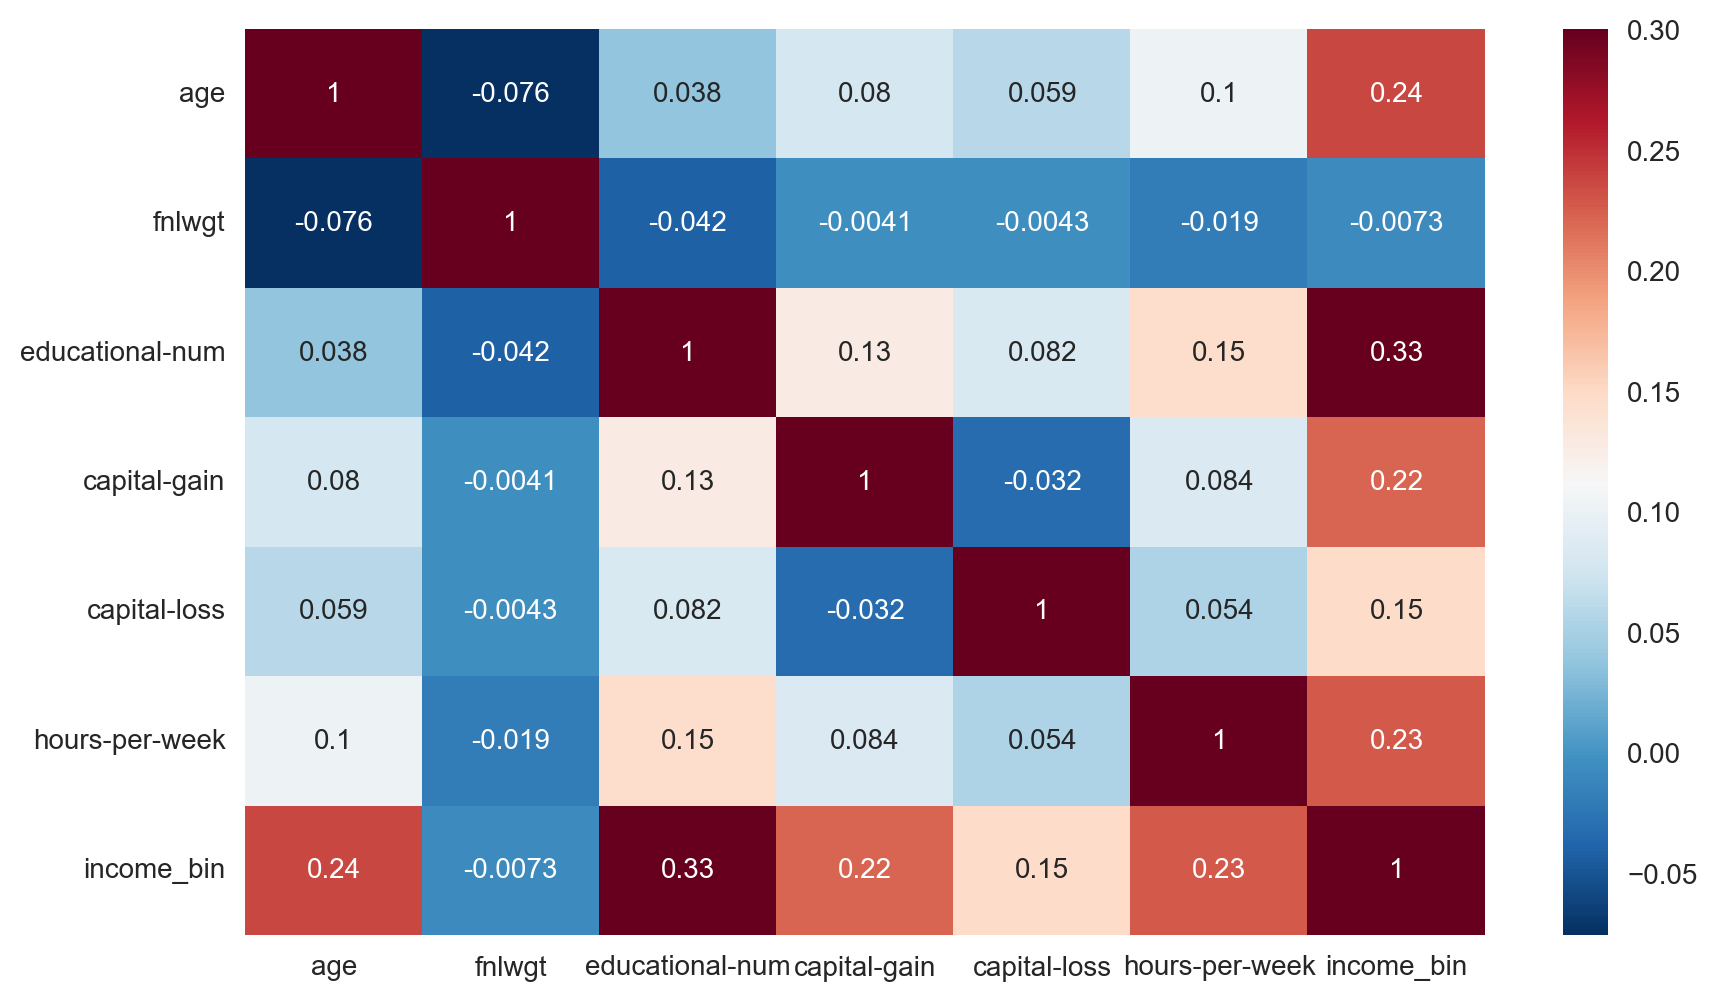

In [277]:
sns.heatmap(df_recodificacion.corr(), annot=True, vmax=.3,cmap = 'RdBu_r')

**Podemos observar correlaciones débiles, y un poco más fuertes en las conclusiones y observaaciones ya vistas:**
* El nivel de ingreso se ve afectado en su mayoría por:
    1. El nivel educacional
    2. Edad
    3. Horas trabajadas
    4. Capital-Gain
* De forma más débil, podemos apreciar relación en:
    1. Horas trabajadas y nivel educacional
    2. Capital-Gain y nivel educacional

-----------

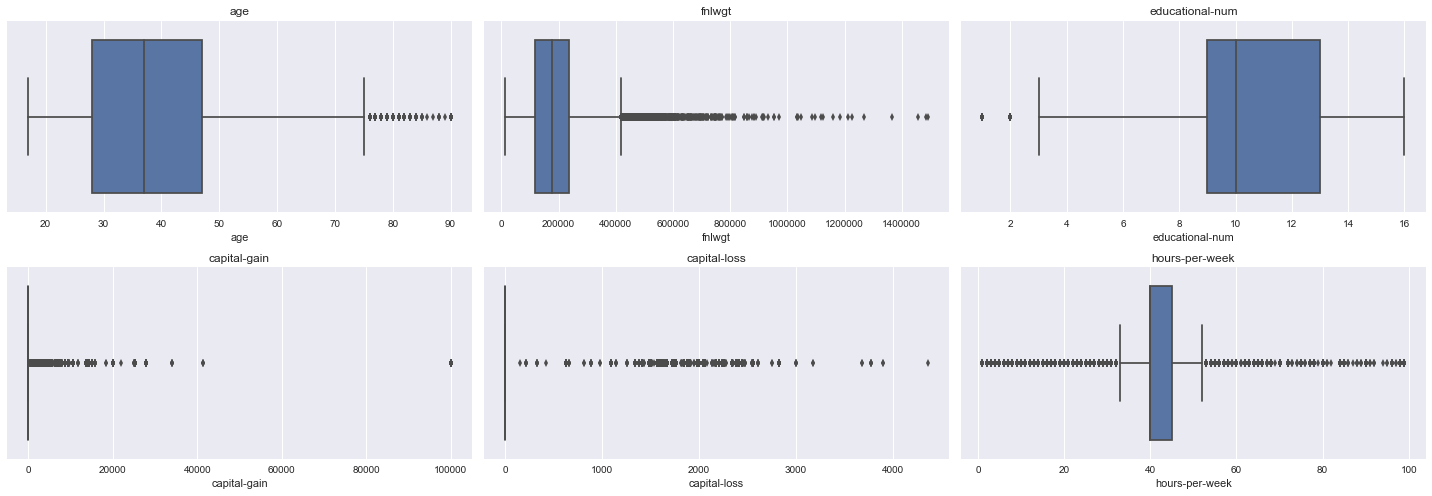

In [14]:
# Figura    
plt.figure(figsize = (20,10))
for i, column in enumerate(df_recodificacion.select_dtypes('int64').columns):
    plt.subplot(3,3,i+1)
    plt.title(column)
    #plt.text(1,1,str(values_N[i])+'%',ha='center',weight='bold',fontsize=0.1)
    sns.boxplot(df_recodificacion[column])
plt.tight_layout()

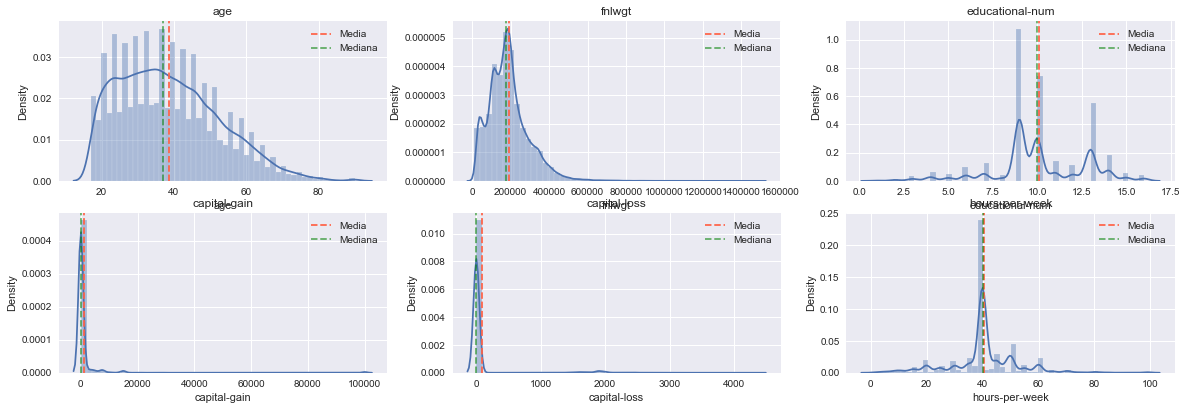

In [15]:
plt.figure(figsize = (20,10))
for index, var in enumerate(df_recodificacion.select_dtypes('int64').columns):
    plt.subplot(3,3,index+1)
    plt.title(var)
    sns.distplot(df[var].dropna())

    media = df[var].dropna().mean()
    mediana = df[var].dropna().median()

    #plt.hist(df[var],color='dodgerblue',alpha=.7)
    plt.axvline(media, color = 'tomato', linestyle = '--', label = f'Media')
    plt.axvline(mediana, color = 'green', linestyle = '--', label = f'Mediana', alpha = .6)

    plt.legend()

- En los datos númericos continuos:
    * Age, podemos observar cierta normalidad en sus datos
    * fnlwgt, al igual que en age podemos ver cierta normalidad en los datos
    * Encontramos gran variabilidad, en las variables capital-gain y capital-loss parecen estar concentradas en cero pero gracias al Boxplot podemos ver los outliers a lo largo de todo el eje.
    - La variable hours-per-week muestra una alta concentracion entorno a una media de 40 horas semanales, que se asemeja a una distribución normal. 
    - La variable educational-num muestra 3 tipos de modas, que son las mismas que en las variables categoricas por lo que podemos precindir de esta variable, dado que no tiene información relevante de forma continua y se exploró solamente para ver algun tipo de tendencia

### Procederemos a analizar el  vector objetivo en comparación con las demás variables.

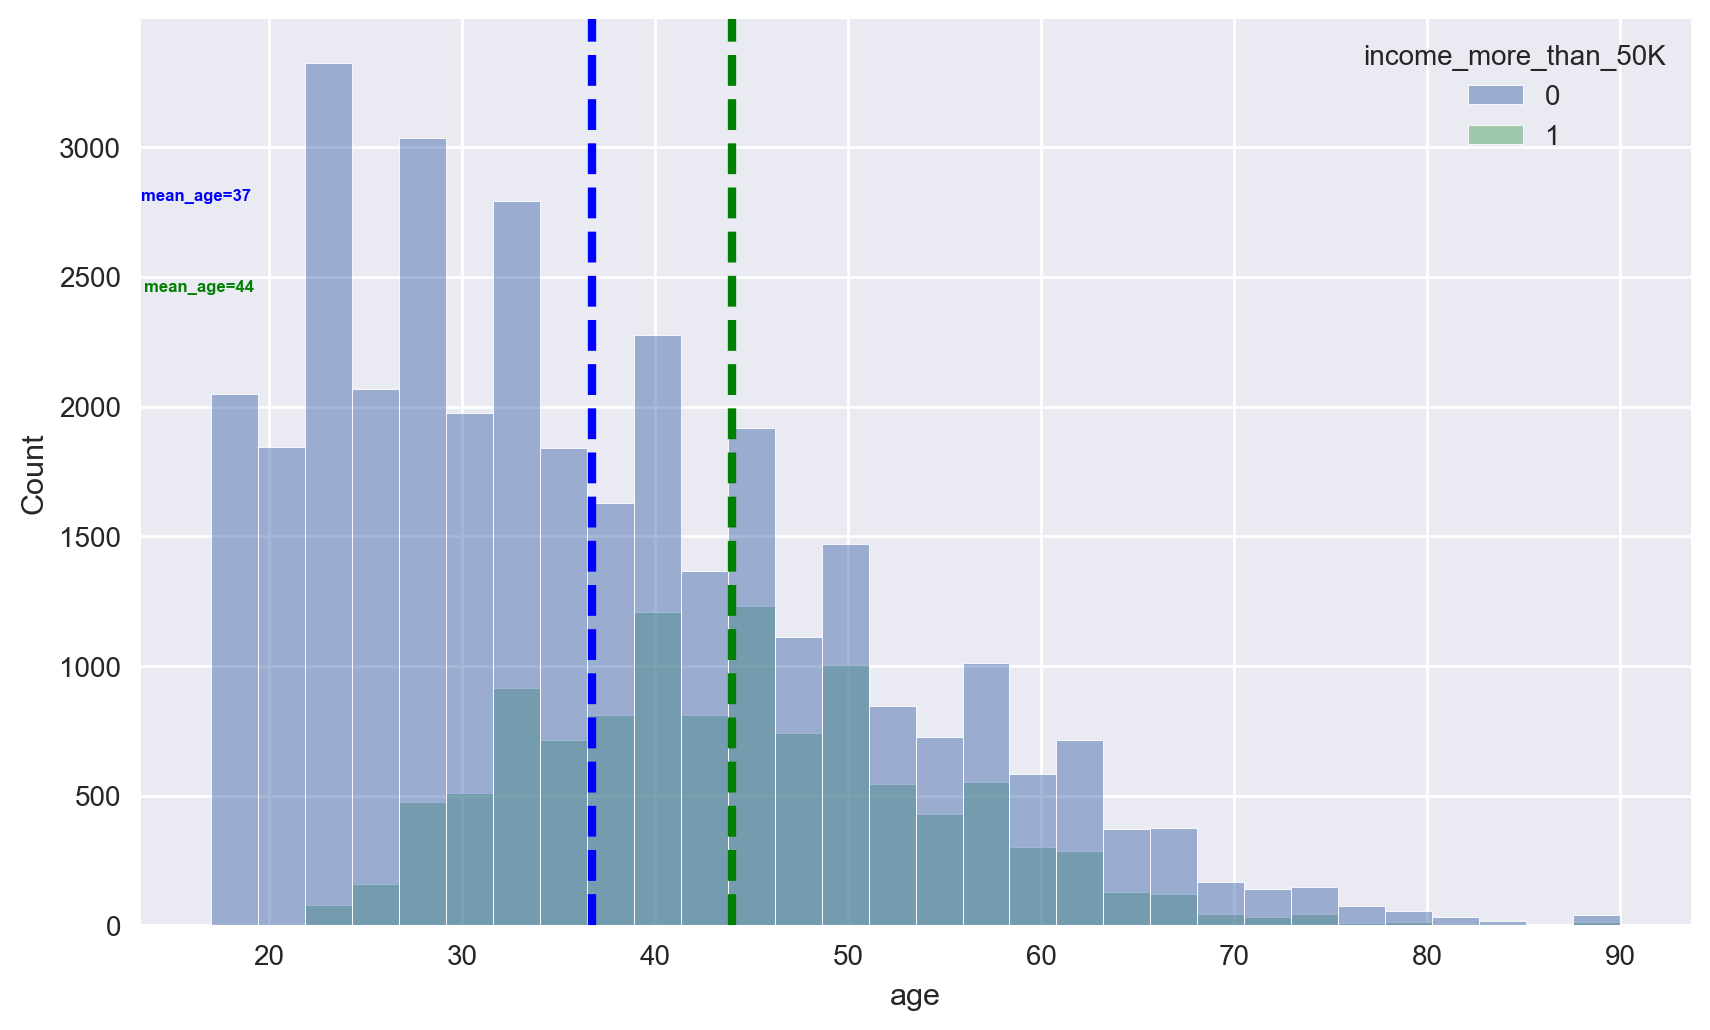

In [82]:
functions.grafico_hist(df_bin,'age','income_more_than_50K')

**Podemos observar interesantemente mayor normalidad para los datos de casos de USD sobre 50k, por lo que podemos inferir una función cuadratica en la edad con respecto al ingreso**

-----------

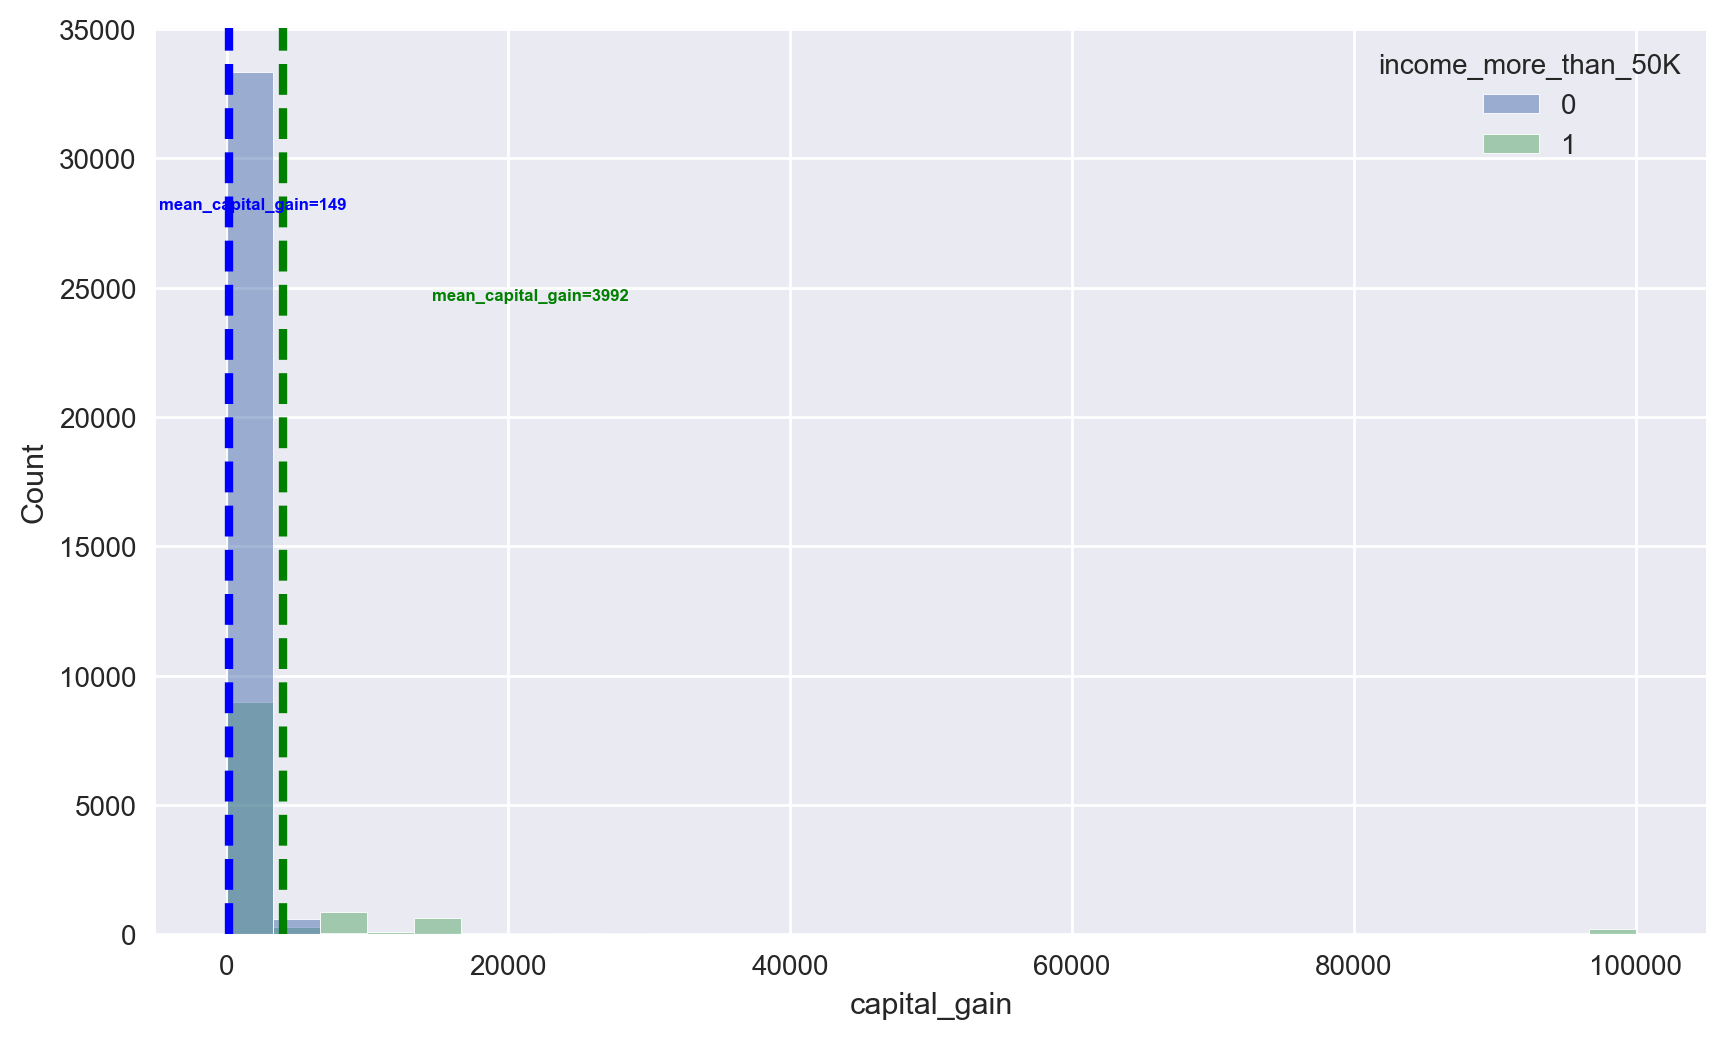

In [83]:
functions.grafico_hist(df_bin,'capital_gain','income_more_than_50K')

**Podemos observar que el capital Gain es solamente para casos positivos de nuestro vector objetivo y cerca de 27 veces más debido a casos extremos de esta variable. A pesar de que es un claro indicador de diferencia, la mayoría de los datos aún se conservan por debajo de 3992 por lo que hace falta un mayor estudio de esta variable.**

-----------

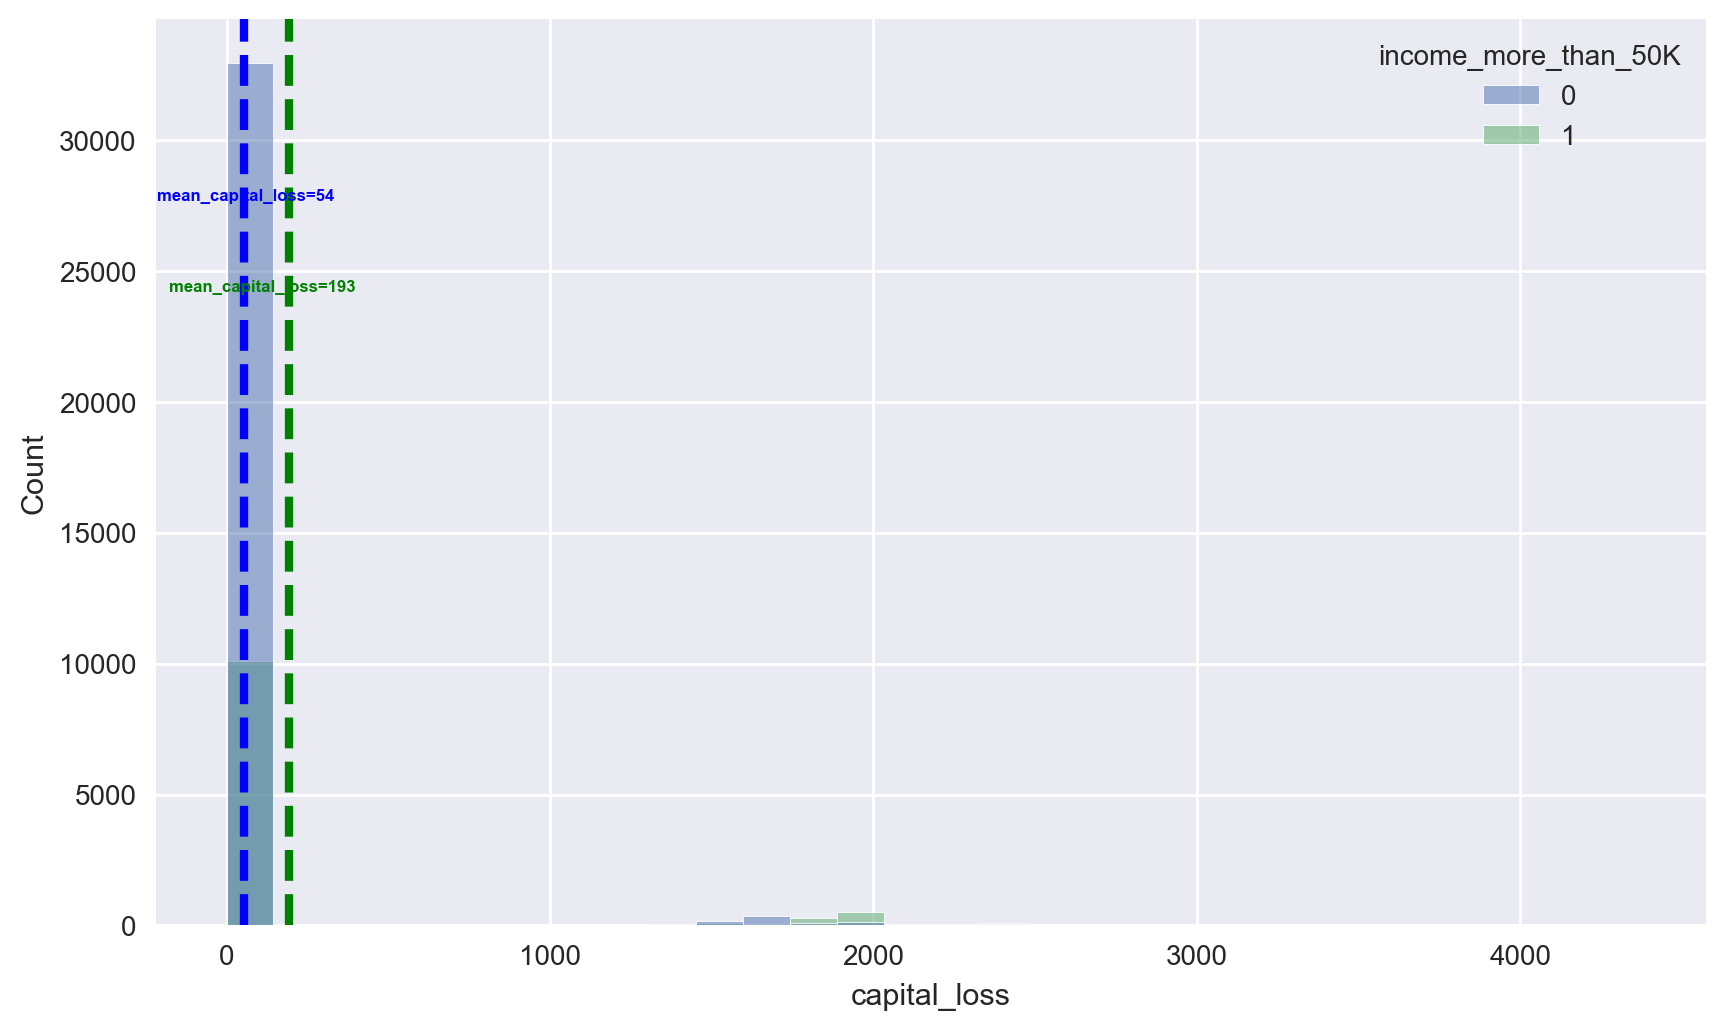

In [84]:
functions.grafico_hist(df_bin,'capital_loss','income_more_than_50K')

**Podemos observar de que a pesar de que nuestro vector objetivo es mayor en la variable, no es tan significativa la diferencia al compararlo con la variable anterior**

-----------

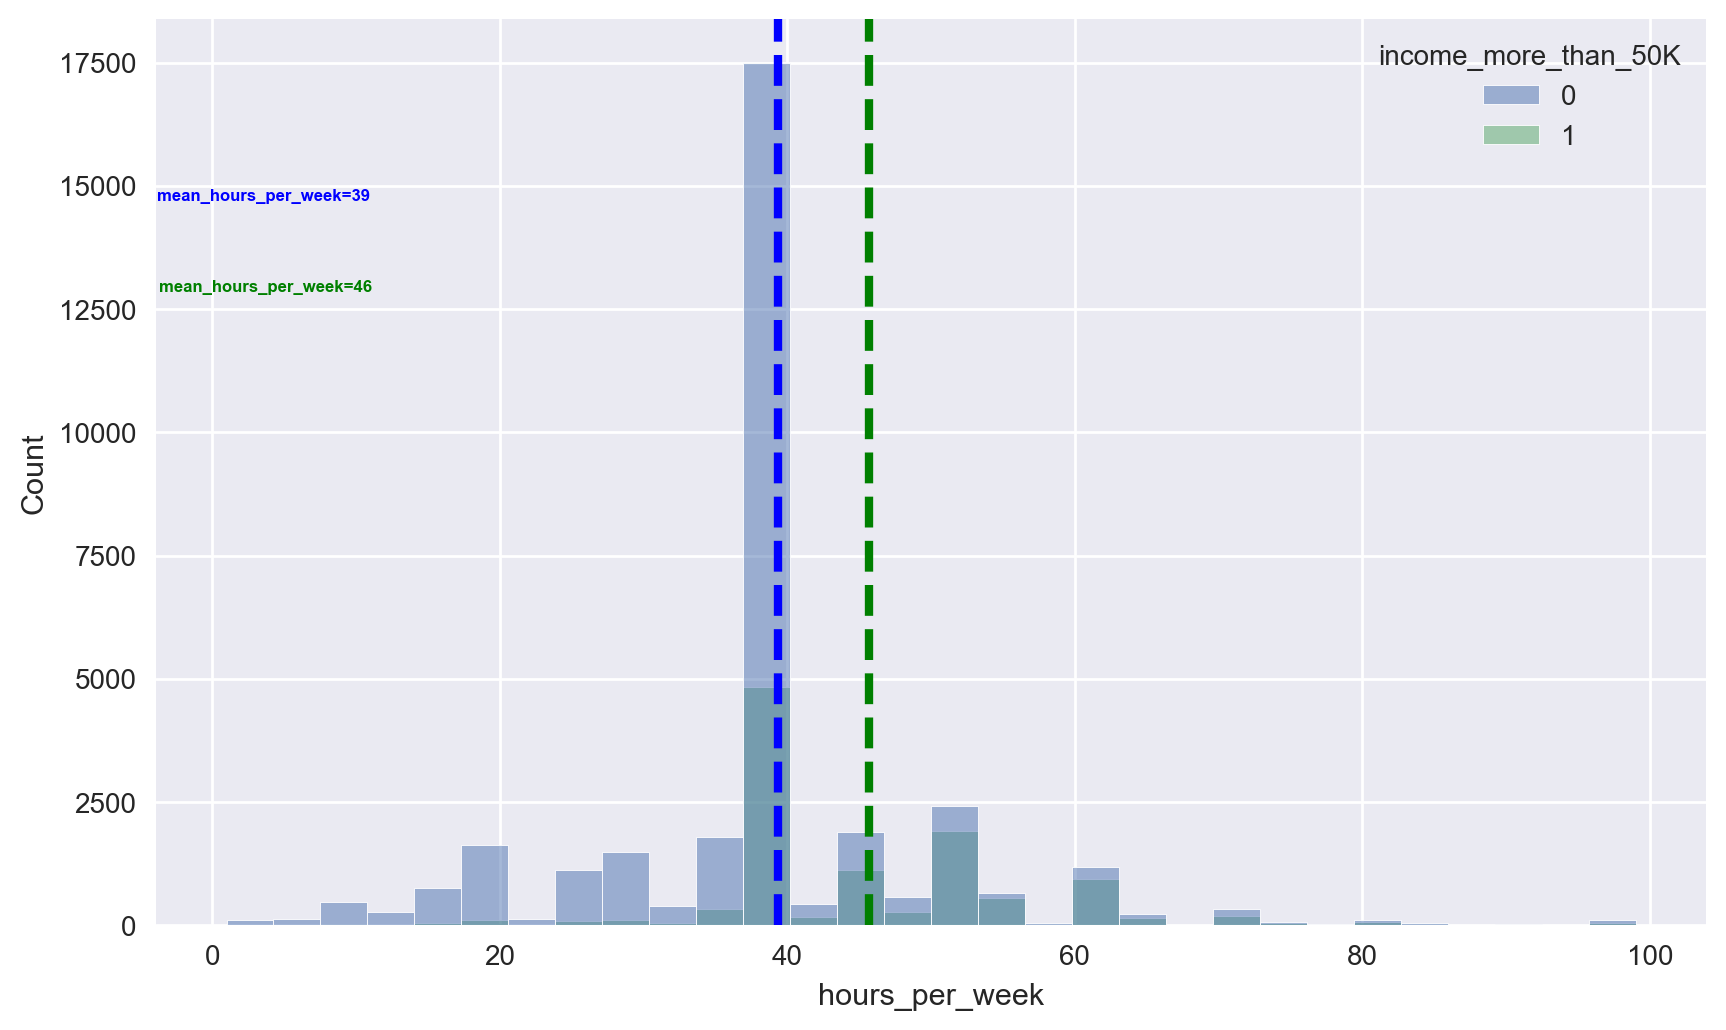

In [85]:
functions.grafico_hist(df_bin,'hours_per_week','income_more_than_50K')

**Podemos observar que en promedio, los casos de personas de la muestra que ganan sobre 50k USD, trabajan en promedio 7 horas más a la semana que los que no pero que la mayor proporcion aún se mantiene en 40 hrs.**

-----------

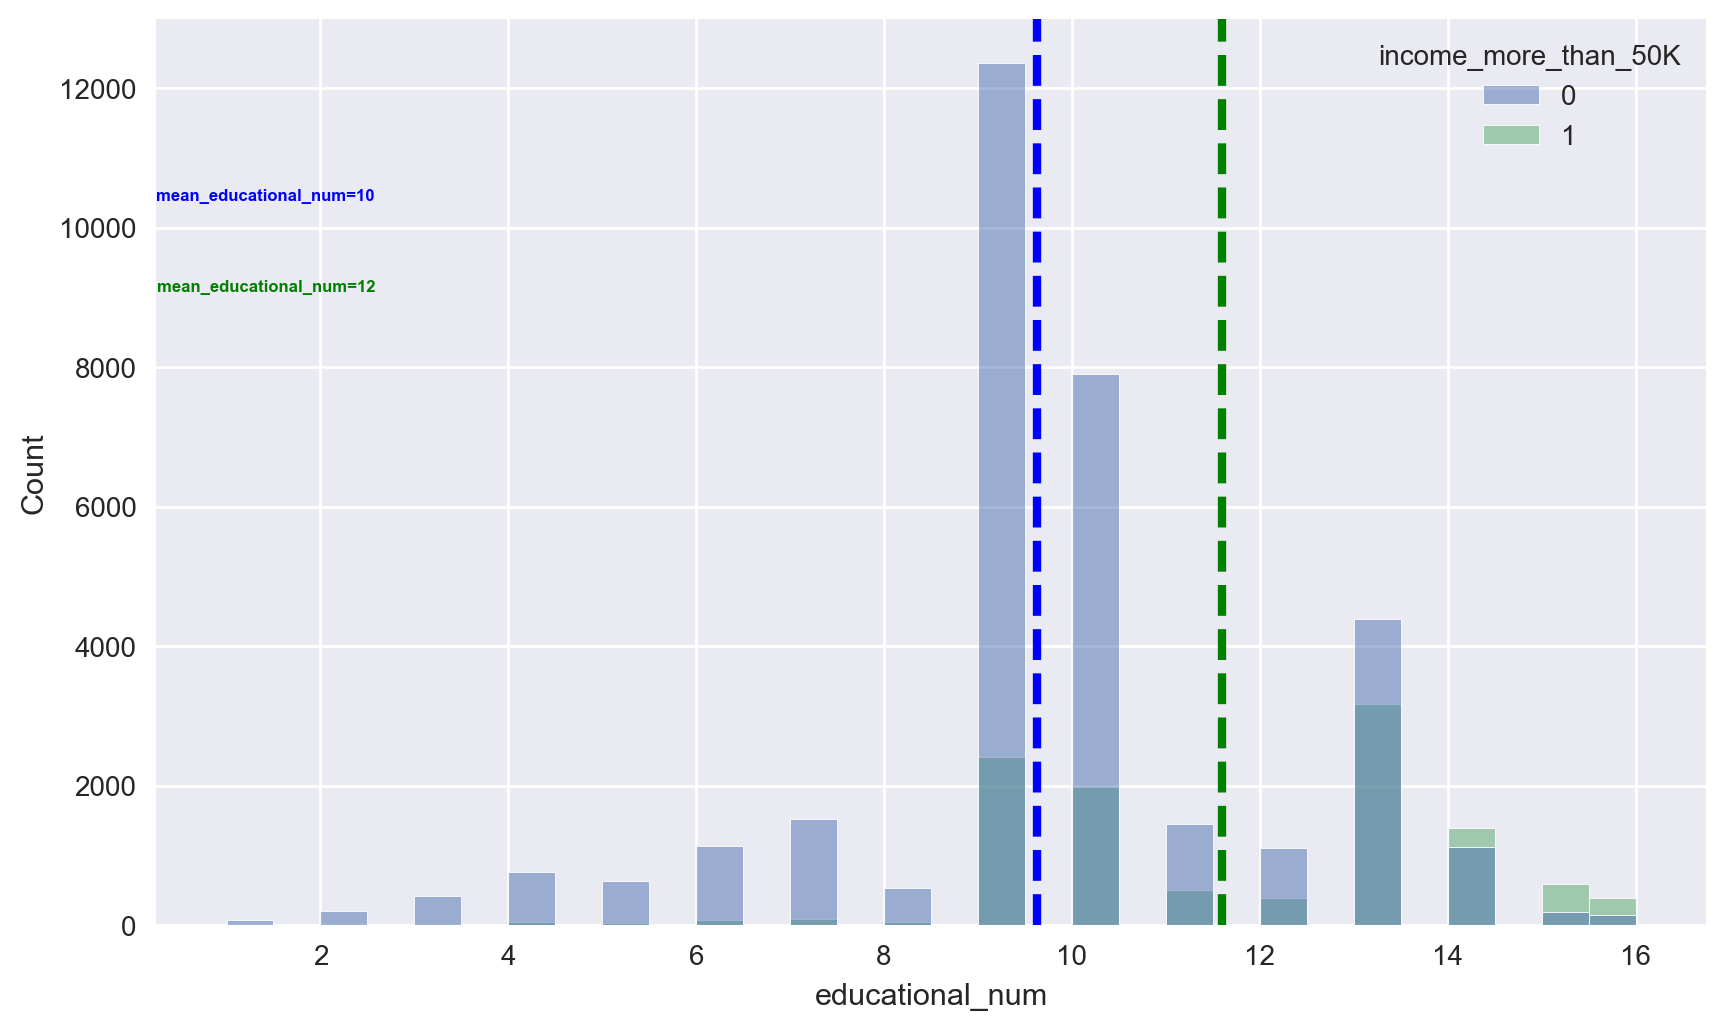

In [86]:
functions.grafico_hist(df_bin,'educational_num','income_more_than_50K')

**Podemos observar diferencias substanciales en el nivel educacional de nuestro vector objetivo, viendo anteriormente que la media ya mediana era 10, en este caso obtenemos 12, siendo interesante también observar que los casos más extremos de los casos con mayor nivel educativo en su mayoría son del vector objetivo, evidenciando una correlación positiva.**

-----------

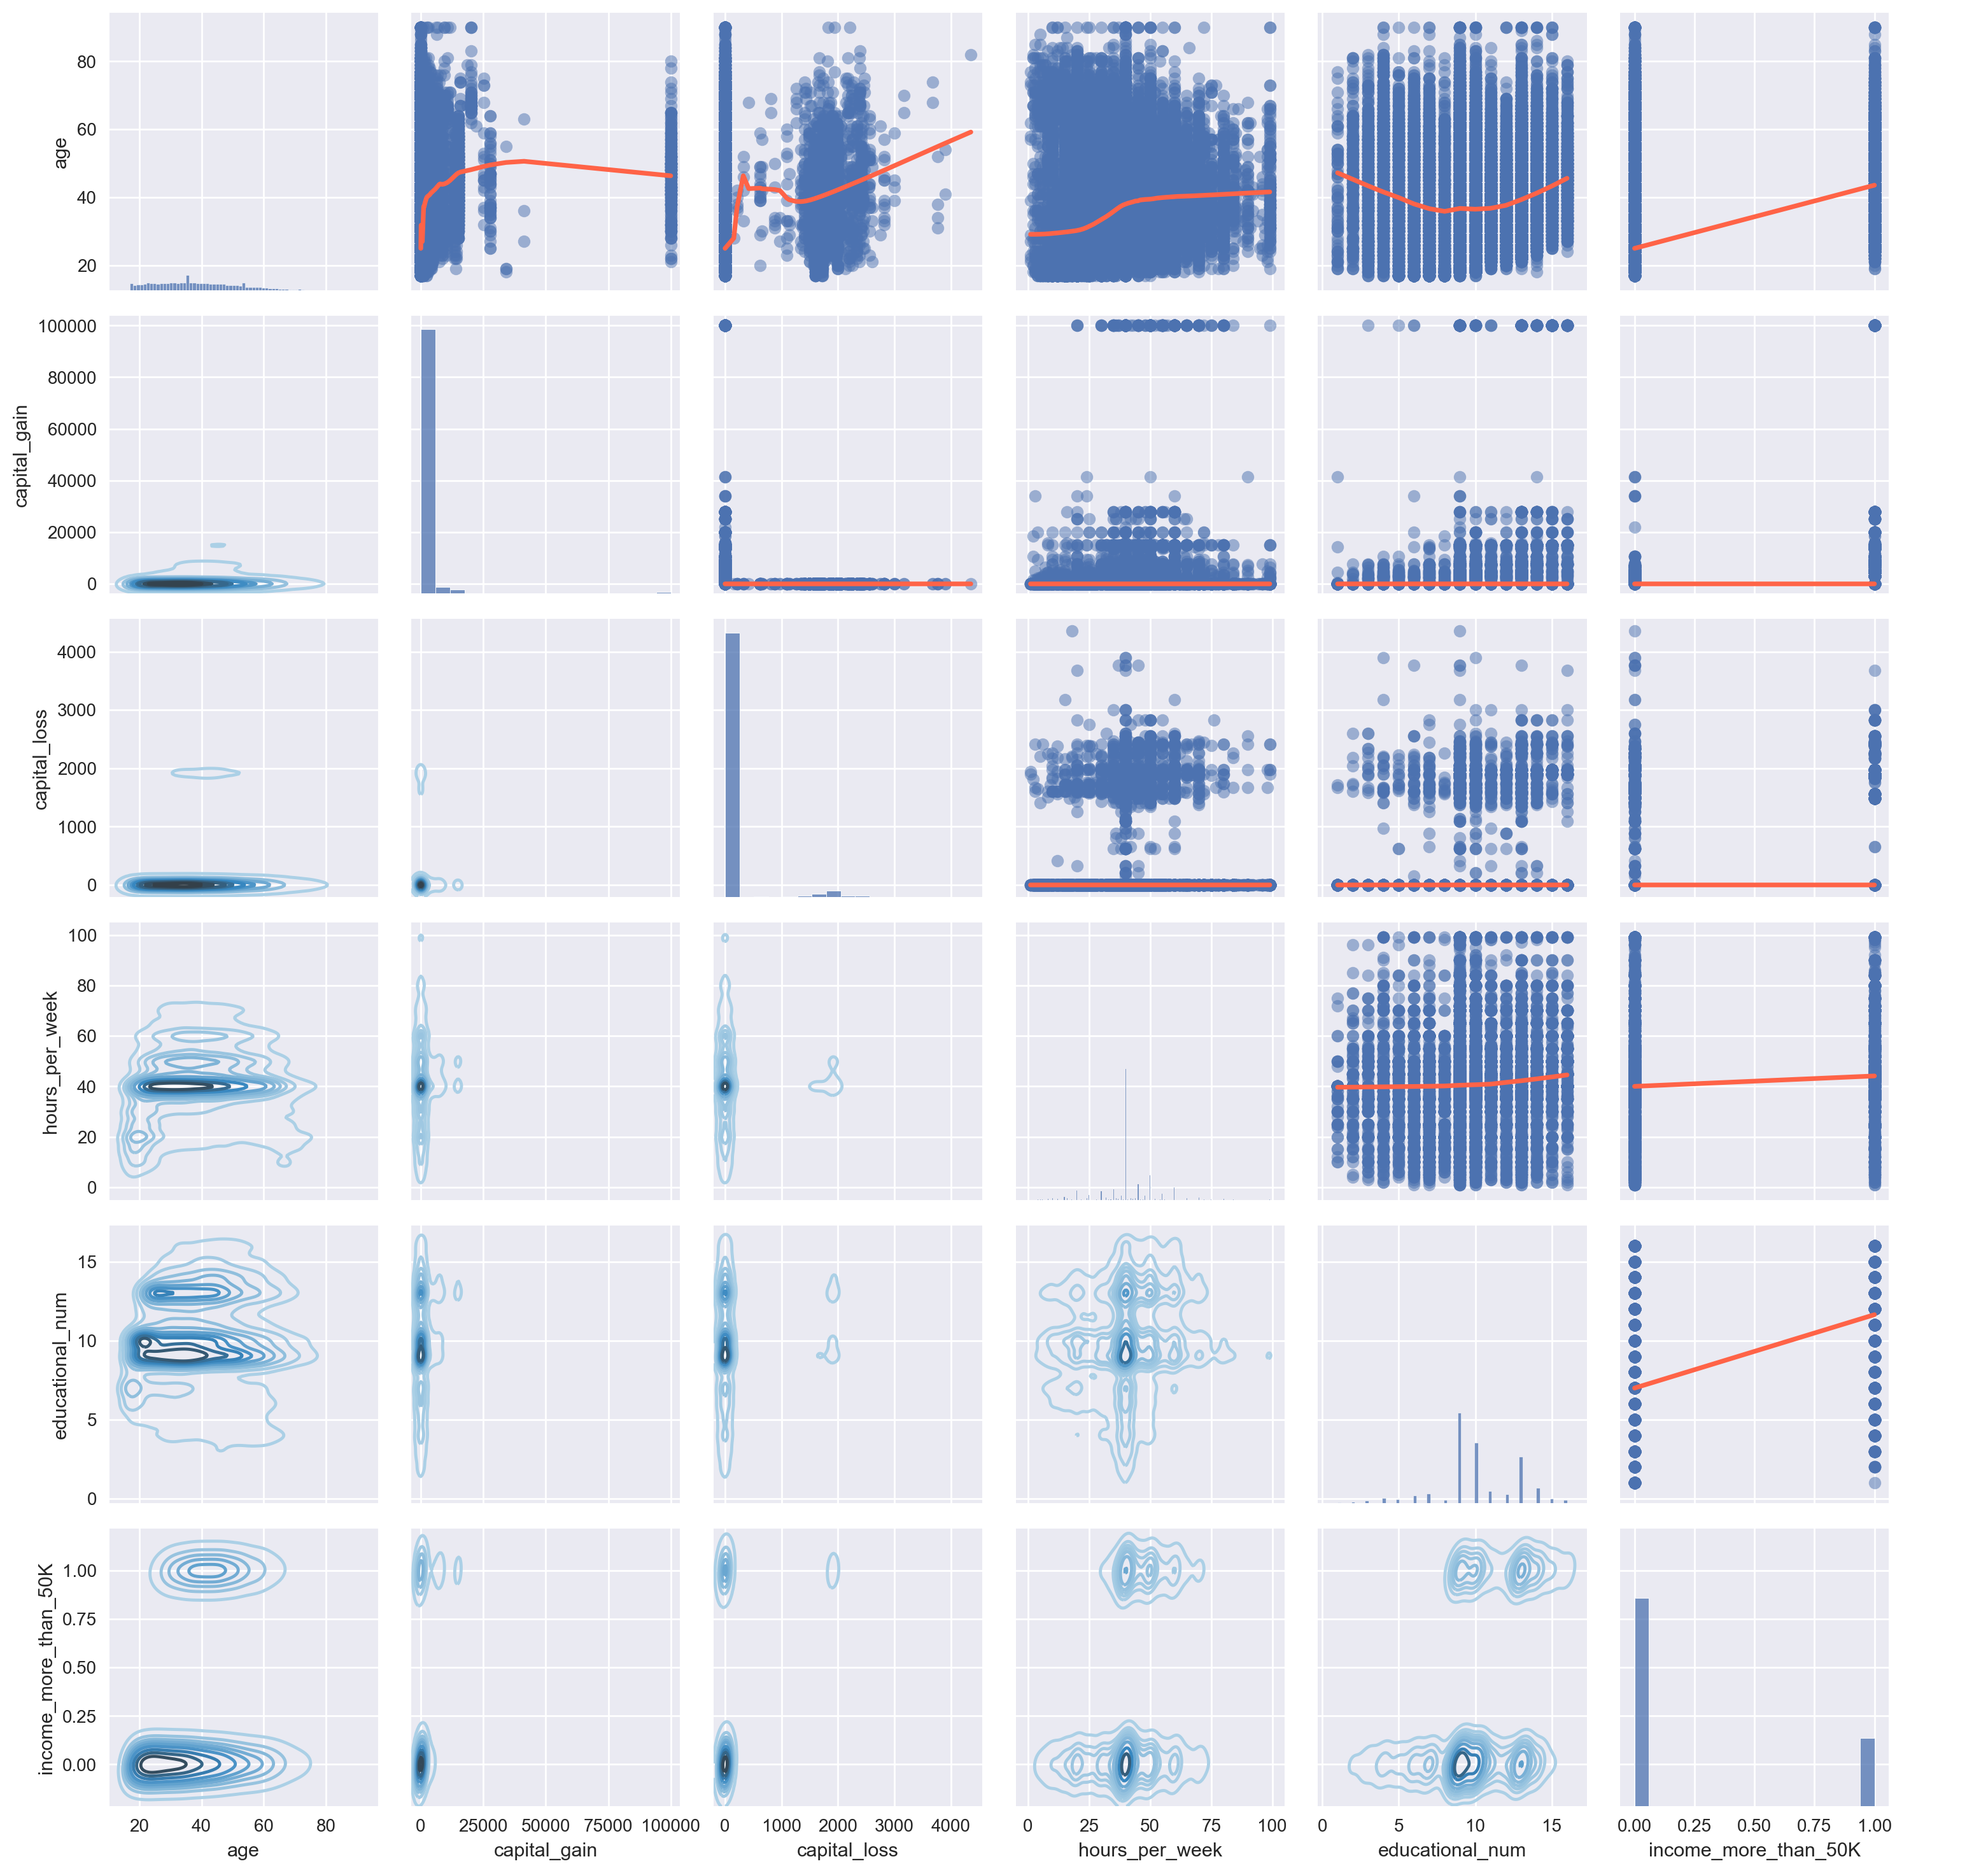

In [88]:
grid = sns.PairGrid(df_bin.loc[:,['age','capital_gain','capital_loss','hours_per_week','educational_num','income_more_than_50K']])
grid = grid.map_diag(sns.histplot)
grid = grid.map_upper(sns.regplot, lowess=True,scatter_kws={'alpha':.5},line_kws={'color':'tomato'})
grid = grid.map_lower(sns.kdeplot, cmap='Blues_d')

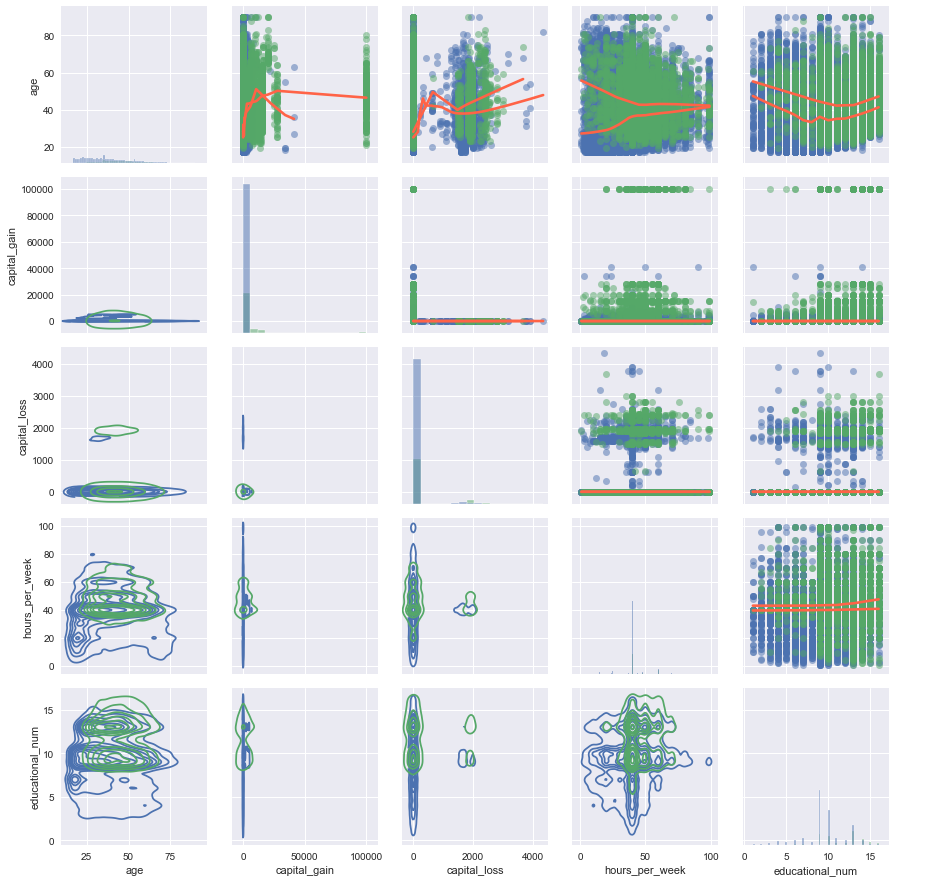

In [33]:
grid = sns.PairGrid(df_bin.loc[:,['age','capital_gain','capital_loss','hours_per_week','educational_num','income_more_than_50K']],hue='income_more_than_50K')
grid = grid.map_diag(sns.histplot)
grid = grid.map_upper(sns.regplot, lowess=True,scatter_kws={'alpha':.5},line_kws={'color':'tomato'})
grid = grid.map_lower(sns.kdeplot, cmap='Blues_d')

**Los siguientes gráficos, Diagonal: Histograma, Diagonal Superior: Regplot, Diagonal Inferior: Kdeplot. Nos ayudan a comprender de manera global la interacción de las variables continuas, evidenciando muchas de las observaciones antes señaladas pero agregando las otras relaciones de variables:**

* Age vs Capital Gain: Podemos observar que solo cierto rango acotado de edad obtiene capital gain, cerca de entre 25 y 60 años.
* Age vs Capital Loss: Podemos observar que cierto rango acotado de edad son los que obtienen la mayor pérdida, cercanos a 25 y 52 años.
* Educational_num: Podemos observar 2 grupos bien marcados de casos positivos de nuestro Vector Objetivo pero que se distribuye uniformemente en la edad.
    * Junto con hours per week, podemos observar que hay un pequeño grupo que trabaja menos que la media y  tiene un nivel educacional promedio en comparación al vector objetivo, también que en los grupos superiores e inferiores se evidencia similitud en la distribución de horas  trabajadas.
    * Junto con capital-loss, podemos observar que hay dos subgrupos distintos de 0, en donde se el capital loss es positivo.
        
